In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn import metrics
from scipy.spatial.distance import cdist 

In [2]:
data_load=sklearn.datasets.load_iris()

In [11]:
from sklearn.cluster import KMeans
score_1=[]
score_2=[]
inertia=[]
distortion=[]
for i in range(2,10):
    model=KMeans(n_clusters=i)
    model.fit(data_load.data)
    distortion.append(sum(np.min(cdist(data_load.data, model.cluster_centers_,'euclidean'),
                                 axis=1)) / data_load.data.shape[0])
#     print((np.min(cdist(data_load.data, model.cluster_centers_,'euclidean'),axis=1)) / data_load.data.shape[0])
    inertia.append(model.inertia_/data_load.data.shape[0])
    score_1.append(metrics.silhouette_score(data_load.data, model.labels_))
    score_2.append(metrics.calinski_harabaz_score(data_load.data, model.labels_))

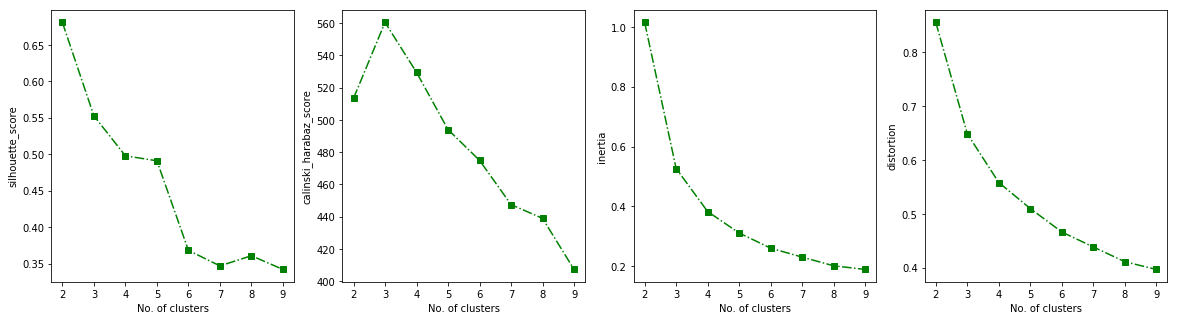

In [13]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.plot(np.arange(2,10), score_1, '-.gs' ,label='silhouette_score')
plt.xlabel('No. of clusters')
plt.ylabel('silhouette_score')
plt.subplot(1,4,2)
plt.plot(np.arange(2,10), score_2,'-.gs' ,label='calinski_harabaz_score')
plt.xlabel('No. of clusters')
plt.ylabel('calinski_harabaz_score')
plt.subplot(1,4,3)
plt.plot(np.arange(2,10), inertia,'-.gs' ,label='inertia')
plt.xlabel('No. of clusters')
plt.ylabel('inertia')
plt.subplot(1,4,4)
plt.plot(np.arange(2,10), distortion,'-.gs' ,label='distortion')
plt.xlabel('No. of clusters')
plt.ylabel('distortion')

plt.show()
# print('Silhouette Coefficient', metrics.silhouette_score(data_load.data, model.labels_))
# print('Calinski-Harabasz Index:', metrics.calinski_harabaz_score(data_load.data, model.labels_))

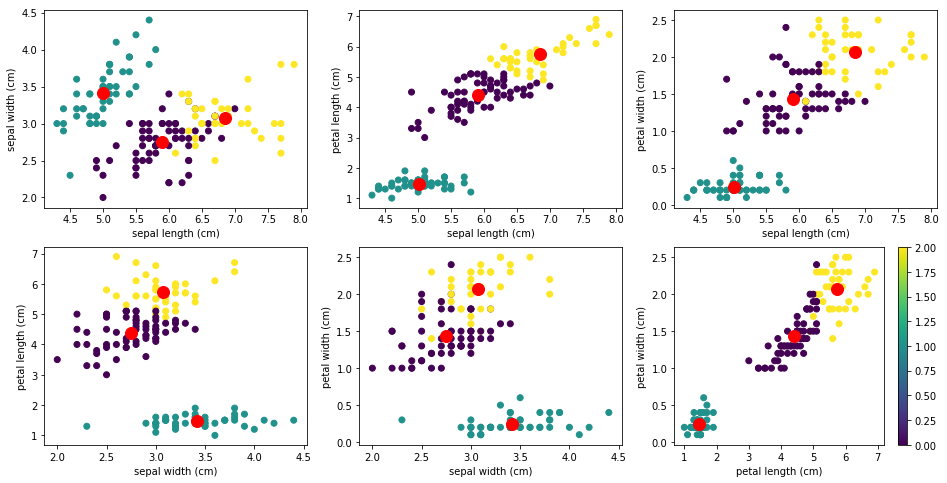

In [5]:
import matplotlib.pyplot as plt
model=KMeans(n_clusters=3)
model.fit(data_load.data)
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(data_load.data[:,0],data_load.data[:,1], c=model.labels_)
plt.plot(model.cluster_centers_[:,0],model.cluster_centers_[:,1], 'ro', markersize=12)
plt.xlabel(data_load.feature_names[0])
plt.ylabel(data_load.feature_names[1])
plt.subplot(2,3,2)
plt.scatter(data_load.data[:,0],data_load.data[:,2], c=model.labels_)
plt.plot(model.cluster_centers_[:,0],model.cluster_centers_[:,2], 'ro', markersize=12)
plt.xlabel(data_load.feature_names[0])
plt.ylabel(data_load.feature_names[2])
plt.subplot(2,3,3)
plt.scatter(data_load.data[:,0],data_load.data[:,3], c=model.labels_)
plt.plot(model.cluster_centers_[:,0],model.cluster_centers_[:,3], 'ro', markersize=12)
plt.xlabel(data_load.feature_names[0])
plt.ylabel(data_load.feature_names[3])
plt.subplot(2,3,4)
plt.scatter(data_load.data[:,1],data_load.data[:,2], c=model.labels_)
plt.plot(model.cluster_centers_[:,1],model.cluster_centers_[:,2], 'ro', markersize=12);
plt.xlabel(data_load.feature_names[1])
plt.ylabel(data_load.feature_names[2])
plt.subplot(2,3,5)
plt.scatter(data_load.data[:,1],data_load.data[:,3], c=model.labels_)
plt.plot(model.cluster_centers_[:,1],model.cluster_centers_[:,3], 'ro', markersize=12);
plt.xlabel(data_load.feature_names[1])
plt.ylabel(data_load.feature_names[3])
plt.subplot(2,3,6)
plt.scatter(data_load.data[:,2],data_load.data[:,3], c=model.labels_)
plt.plot(model.cluster_centers_[:,2],model.cluster_centers_[:,3], 'ro', markersize=12);
plt.xlabel(data_load.feature_names[2])
plt.ylabel(data_load.feature_names[3])
plt.colorbar();
plt.show()

In [6]:
metrics.confusion_matrix(np.concatenate((np.ones(50),np.zeros(50),np.full(50,2))),model.labels_)

array([[48,  0,  2],
       [ 0, 50,  0],
       [14,  0, 36]], dtype=int64)